# Imports y configuraciones iniciales

In [1]:
# Ubicarse en el path principal del repositorio
import sys
sys.path.append('../')

In [2]:
# !pip install quickdraw

In [3]:
import numpy as np

Obtenemos el arreglo numpy conseguido en [Google cloud](https://console.cloud.google.com/storage/browser/quickdraw_dataset;tab=objects?prefix=&forceOnObjectsSortingFiltering=false).

In [4]:
arr = np.load(r"..\data\face.npy")
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
arr.shape

(161666, 784)

Notamos que es un arreglo de dimensiones `(161666, 784)`. La primera componente es el número de imágenes que hay en el dataset y el segundo es un arreglo que hay que redimensionarlo a $28\times28$, pues $\sqrt{784} = 28$.

In [6]:
data = arr[0].reshape(28, 28)
data.shape

(28, 28)

Notamos que es un arreglo de enteros en donde los valores van desde el 0 hasta el 255. Ploteamos el arreglo para tener una mejor visualización.

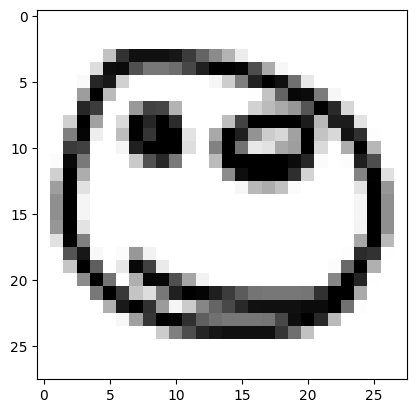

In [7]:
from matplotlib import pyplot as plt

plt.imshow(data, cmap="gray_r")
plt.show()

Notamos que la calidad de la imagen no es la esperada. Es por este motivo en que se buscará una alternativa para obtener los datos.

Sin embargo, dado que podría servir en un futuro, veamos como pasar esta matriz como una imagen `Pillow`

In [8]:
import PIL

image = PIL.Image.fromarray(255-data)
image

Después de investigar, se encuentra la API [quickdraw](https://quickdraw.readthedocs.io/en/latest/index.html) para Python, esta librería permite un manejo sencillo de los datos.

Las siguientes líneas de código fue resultado de jugar con esta librería.

In [9]:
from quickdraw import QuickDrawData

qd = QuickDrawData()
anvil = qd.get_drawing("anvil")

print(anvil)

loading anvil drawings
load complete
QuickDrawing key_id=6589409094795264


In [10]:
print(f"{anvil.name = }")
print(f"{anvil.key_id = }")
print(f"{anvil.countrycode = }")
print(f"{anvil.recognized = }")
print(f"{anvil.timestamp = }")
print(f"{anvil.no_of_strokes = }")
print(f"{anvil.image_data = }")
print(f"{anvil.strokes = }")

anvil.name = 'anvil'
anvil.key_id = 6589409094795264
anvil.countrycode = 'HU'
anvil.recognized = True
anvil.timestamp = 1488737562
anvil.no_of_strokes = 1
anvil.image_data = [((40, 100, 116, 117, 71, 66, 65, 112, 151, 186, 188, 152, 152, 167, 237, 255, 238, 10, 0, 8), (53, 53, 56, 125, 127, 136, 153, 152, 157, 157, 127, 126, 63, 56, 56, 0, 4, 4, 15, 44))]
anvil.strokes = [[(40, 53), (100, 53), (116, 56), (117, 125), (71, 127), (66, 136), (65, 153), (112, 152), (151, 157), (186, 157), (188, 127), (152, 126), (152, 63), (167, 56), (237, 56), (255, 0), (238, 4), (10, 4), (0, 15), (8, 44)]]


In [11]:
# Salva la información de la imagen.
# anvil.image.save("my_anvil.gif")

In [12]:
from quickdraw import QuickDrawDataGroup

qdg = QuickDrawDataGroup("anvil")
for drawing in list(qdg.drawings)[:10]:
    print(drawing)

loading anvil drawings
load complete
QuickDrawing key_id=5355190515400704
QuickDrawing key_id=4675518521671680
QuickDrawing key_id=4718287013281792
QuickDrawing key_id=5620379110342656
QuickDrawing key_id=4925900967641088
QuickDrawing key_id=4801451488444416
QuickDrawing key_id=6721424930635776
QuickDrawing key_id=5772297476505600
QuickDrawing key_id=5518443702910976
QuickDrawing key_id=5715853184073728


In [13]:
from quickdraw import QuickDrawData
from PIL import Image, ImageDraw

qd = QuickDrawData()
anvil = qd.get_drawing("anvil")

anvil_image = Image.new("RGB", (255,255), color=(255,255,255))
anvil_drawing = ImageDraw.Draw(anvil_image)

for stroke in anvil.strokes:
    anvil_drawing.line(stroke, fill=(0,0,0), width=2)

    for coordinate in range(len(stroke)-1):
        x1 = stroke[coordinate][0]
        y1 = stroke[coordinate][1]
        x2 = stroke[coordinate+1][0]
        y2 = stroke[coordinate+1][1]
        anvil_drawing.line((x1,y1,x2,y2), fill=(0,0,0), width=2)

anvil_image.show()

loading anvil drawings
load complete


In [14]:
stroke

[(2, 23),
 (3, 97),
 (38, 103),
 (108, 101),
 (112, 115),
 (119, 172),
 (117, 198),
 (113, 208),
 (100, 221),
 (89, 226),
 (49, 232),
 (47, 243),
 (58, 247),
 (140, 255),
 (188, 254),
 (217, 247),
 (230, 219),
 (225, 212),
 (181, 196),
 (170, 183),
 (159, 158),
 (152, 130),
 (149, 82),
 (150, 78),
 (161, 74),
 (250, 60),
 (254, 46),
 (238, 13),
 (213, 4),
 (187, 0),
 (39, 5),
 (7, 11),
 (0, 32)]

In [15]:
from quickdraw import QuickDrawData

qd = QuickDrawData()

anvil = qd.get_drawing("anvil")
print(anvil)

ant = qd.get_drawing("ant")
print(ant)

loading anvil drawings
load complete
QuickDrawing key_id=5932542467244032
loading ant drawings
load complete
QuickDrawing key_id=6072443477164032


In [16]:
from quickdraw import QuickDrawDataGroup

anvils = QuickDrawDataGroup("anvil")
for anvil in list(anvils.drawings)[:10]:
    print(anvil)

loading anvil drawings
load complete
QuickDrawing key_id=5355190515400704
QuickDrawing key_id=4675518521671680
QuickDrawing key_id=4718287013281792
QuickDrawing key_id=5620379110342656
QuickDrawing key_id=4925900967641088
QuickDrawing key_id=4801451488444416
QuickDrawing key_id=6721424930635776
QuickDrawing key_id=5772297476505600
QuickDrawing key_id=5518443702910976
QuickDrawing key_id=5715853184073728


A partir de aquí estaremos generando código para nuestros propósitos.

In [17]:
# Obtenemos el grupo de dibujos de la categoría de caritas.
faces = QuickDrawDataGroup("face")

# Se itera por todas las imágenes para observar la representación de las caras.
for face in list(faces.drawings)[:10]:
    print(face)

loading face drawings
load complete
QuickDrawing key_id=5152530285723648
QuickDrawing key_id=6485643624448000
QuickDrawing key_id=5797653046624256
QuickDrawing key_id=6263665525260288
QuickDrawing key_id=4601828958273536
QuickDrawing key_id=5484978555060224
QuickDrawing key_id=5450560280985600
QuickDrawing key_id=6108140510642176
QuickDrawing key_id=5103347696664576
QuickDrawing key_id=5108726367256576


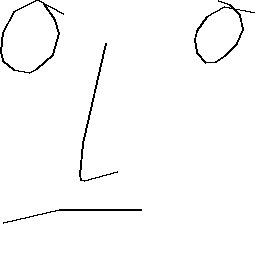

In [18]:
# Observar cómo se visualiza la property image. Este retorna una instancia de Pillow.
face.image

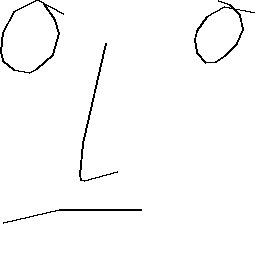

In [19]:
# Transformar la imagen a arreglo, y visualizar el arreglo.
a = np.asarray(face.image)
Image.fromarray(a)

In [20]:
# Observar las dimensiones del arreglo.
a.shape

(255, 255, 3)

In [21]:
from quickdraw import QuickDrawDataGroup

DATASET_NAME = "face"

qd_data_group = QuickDrawDataGroup(DATASET_NAME, max_drawings=None)
print(f"{qd_data_group.drawing_count = }")

loading face drawings
load complete
qd_data_group.drawing_count = 161666


In [22]:
draw = qd_data_group.get_drawing(0)
print(f"{draw.name = }")
print(f"{draw.key_id = }")
print(f"{draw.countrycode = }")
print(f"{draw.recognized = }")
print(f"{draw.timestamp = }")
print(f"{draw.no_of_strokes = }")
print(f"{draw.image_data = }")
print(f"{draw.strokes = }")

draw.name = 'face'
draw.key_id = 5152530285723648
draw.countrycode = 'CH'
draw.recognized = True
draw.timestamp = 1489938759
draw.no_of_strokes = 4
draw.image_data = [((59, 44, 28, 17, 8, 0, 0, 13, 32, 49, 85, 110, 136, 167, 189, 209, 229, 254, 254, 238, 222, 206, 181, 137, 86, 50, 38), (1, 5, 20, 42, 70, 109, 139, 169, 190, 201, 216, 221, 222, 222, 217, 209, 195, 144, 105, 66, 48, 37, 24, 8, 0, 0, 7)), ((76, 76, 71, 59, 56, 56, 61, 72, 83, 89, 86, 79, 64, 56), (61, 67, 71, 70, 64, 55, 47, 45, 47, 68, 78, 80, 77, 63)), ((176, 166, 146, 133, 130, 157, 192, 198, 196, 190, 177, 157, 139, 131, 129, 132), (82, 86, 85, 75, 64, 51, 50, 59, 78, 87, 95, 96, 90, 81, 72, 71)), ((57, 68, 80, 110, 153, 202, 216, 228, 231), (168, 180, 185, 195, 200, 200, 195, 186, 179))]
draw.strokes = [[(59, 1), (44, 5), (28, 20), (17, 42), (8, 70), (0, 109), (0, 139), (13, 169), (32, 190), (49, 201), (85, 216), (110, 221), (136, 222), (167, 222), (189, 217), (209, 209), (229, 195), (254, 144), (254, 105), (238, 66

In [23]:
i = 0
for drawing in qd_data_group.drawings:
    print(drawing)
    i += 1
    if i > 10: break

QuickDrawing key_id=5152530285723648
QuickDrawing key_id=6485643624448000
QuickDrawing key_id=5797653046624256
QuickDrawing key_id=6263665525260288
QuickDrawing key_id=4601828958273536
QuickDrawing key_id=5484978555060224
QuickDrawing key_id=5450560280985600
QuickDrawing key_id=6108140510642176
QuickDrawing key_id=5103347696664576
QuickDrawing key_id=5108726367256576
QuickDrawing key_id=5299411745767424


In [24]:
from quickdraw import QuickDrawDataGroup
import numpy as np

# Definir el nombre del data set
DATASET_NAME = "face"

# Instanciar la clase
qd_data_group = QuickDrawDataGroup(DATASET_NAME, max_drawings=None)
print(f"{qd_data_group.drawing_count = }")

draw = qd_data_group.get_drawing(0)  # Obtener el primer dibujo
image = draw.get_image()  # Obtener su imagen Pillow a través del método get_image
arr = np.asarray(image)  # Transformarlo en arreglo
arr.shape  # Obtener las dimensiones del arreglo

loading face drawings
load complete
qd_data_group.drawing_count = 161666


(255, 255, 3)

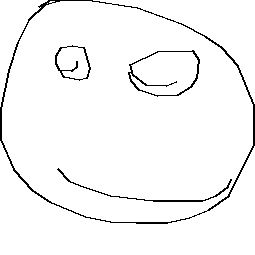

In [25]:
image

face1.min() = 0.0,
face1.max() = 1.0,
face1.sum() = 2170.0

face1.min() = 0.0,
face1.max() = 0.0004608294930875576,
face1.sum() = 1.0


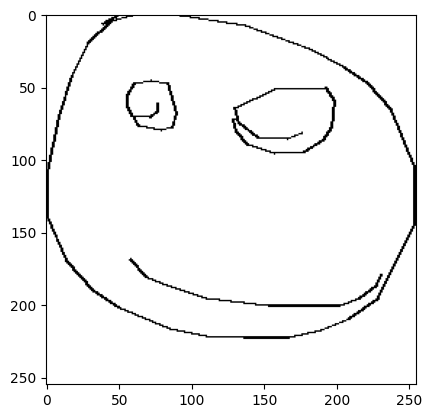

In [26]:
# Obtener una imagen del rango 0 a 1.
#  0 se asigna con el blanco.
face1 = 1 - (arr[:, :, 2] / 255)
print(f"{face1.min() = },\n{face1.max() = },\n{face1.sum() = }\n")

# Transformar en distribución
face1 /= face1.sum()
print(f"{face1.min() = },\n{face1.max() = },\n{face1.sum() = }")

# Plotear
plt.imshow(face1, cmap="gray_r")